In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob

In [3]:
from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

In [4]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

In [5]:
# Make a list of calibration images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


In [6]:
# Read in an image
image = mpimg.imread('../test_images/test6.jpg')
print(image.shape)

#undistort it
dst = cv2.undistort(image, mtx, dist, None, mtx)
print(dst.shape)

(720, 1280, 3)
(720, 1280, 3)


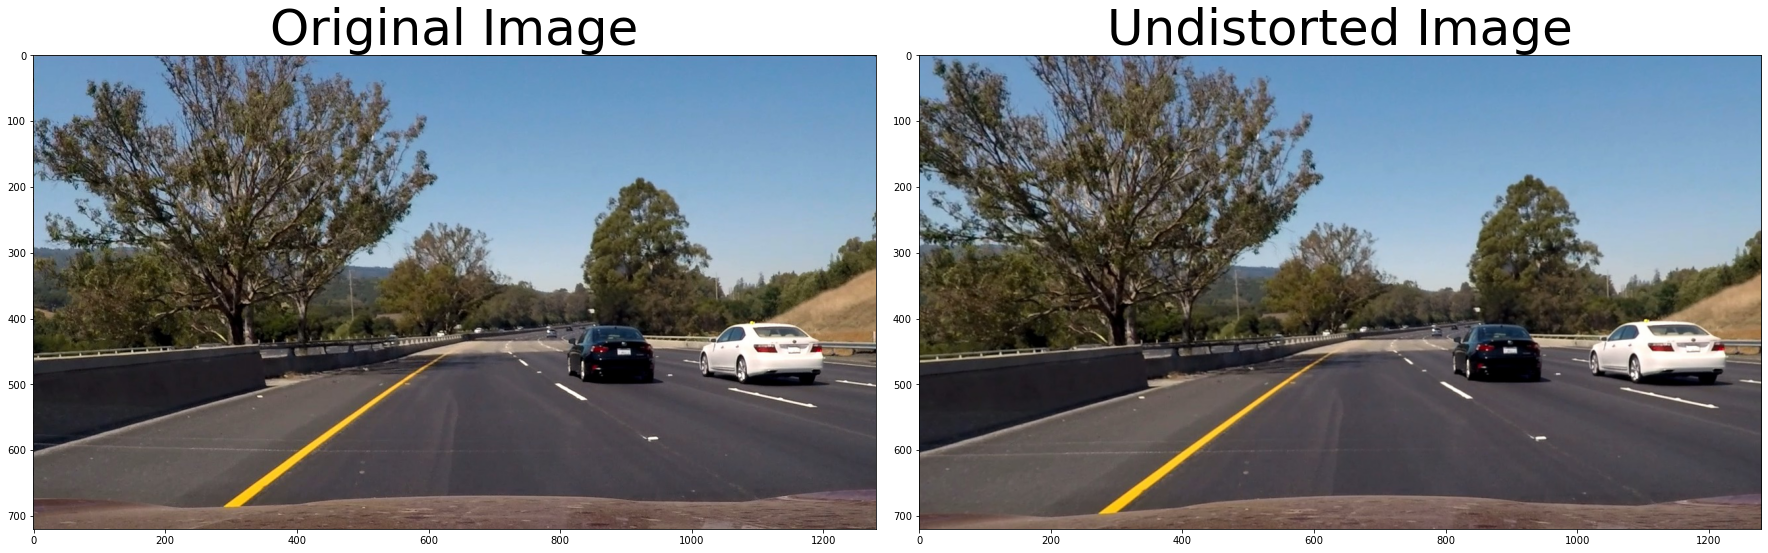

In [7]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [8]:
from scripts.my_color_thresh import HLScolor_thresh


In [9]:
from scripts.my_sobel_thresh import abs_sobel_thresh
from scripts.my_sobel_thresh import mag_thresh
from scripts.my_sobel_thresh import dir_threshold

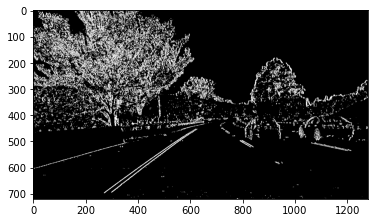

In [10]:
grad_x = abs_sobel_thresh(dst, orient='x', thresh=(20, 100))
plt.imshow(grad_x,cmap="gray")

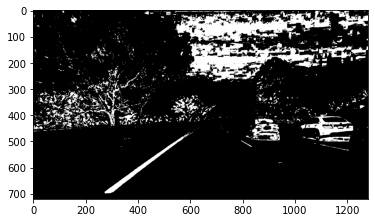

In [11]:
binary_S=HLScolor_thresh(dst,channel='s',thresh=(110,255))
plt.imshow(binary_S,cmap="gray")

### Now the combination

The Green is the gradient threshold  (sobel in X)

The Blue is the color channel threshold (S channel)

(720, 1280, 3)


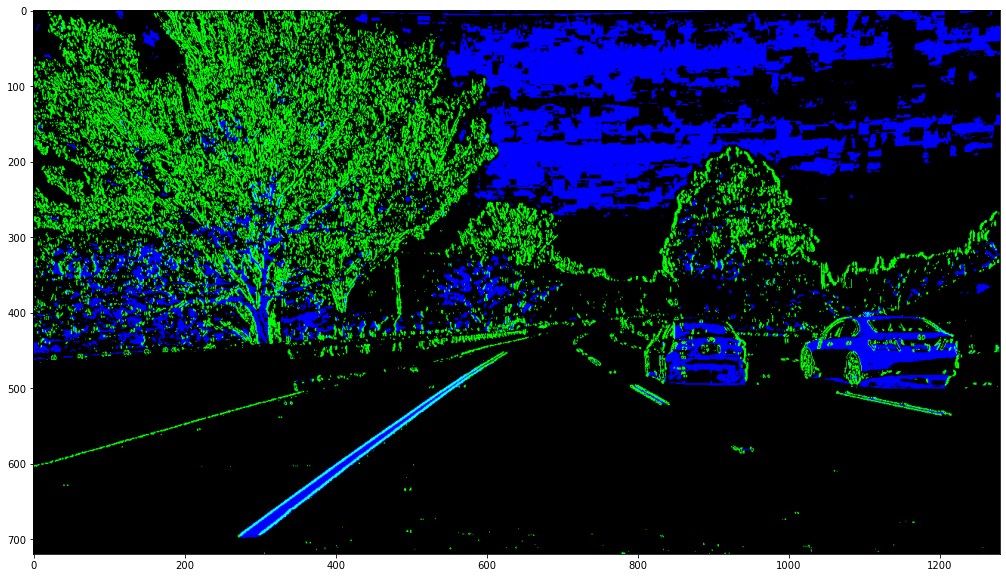

In [12]:
# Stack each channel
color_binary = np.dstack(( np.zeros_like(grad_x), grad_x, binary_S)) * 255
print(color_binary.shape)
plt.figure(figsize=(20,10))
plt.imshow(color_binary)

Now combine both images

In [13]:
# Combine the two binary thresholds
combined_binary = np.zeros_like(grad_x)
combined_binary[(binary_S == 1) | (grad_x == 1)] = 1

(720, 1280)


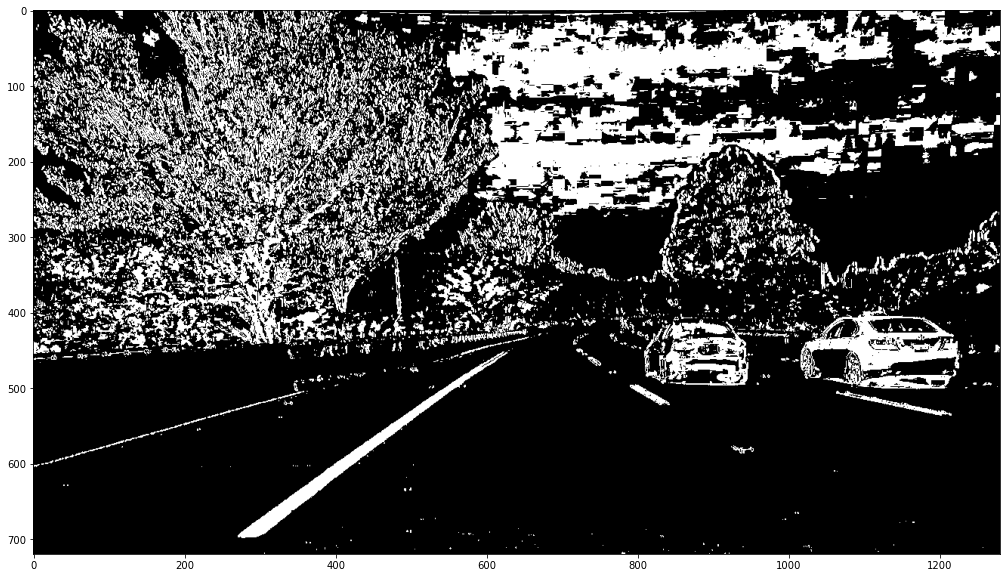

In [14]:
print(combined_binary.shape)
plt.figure(figsize=(20,10))
plt.imshow(combined_binary,cmap="gray")

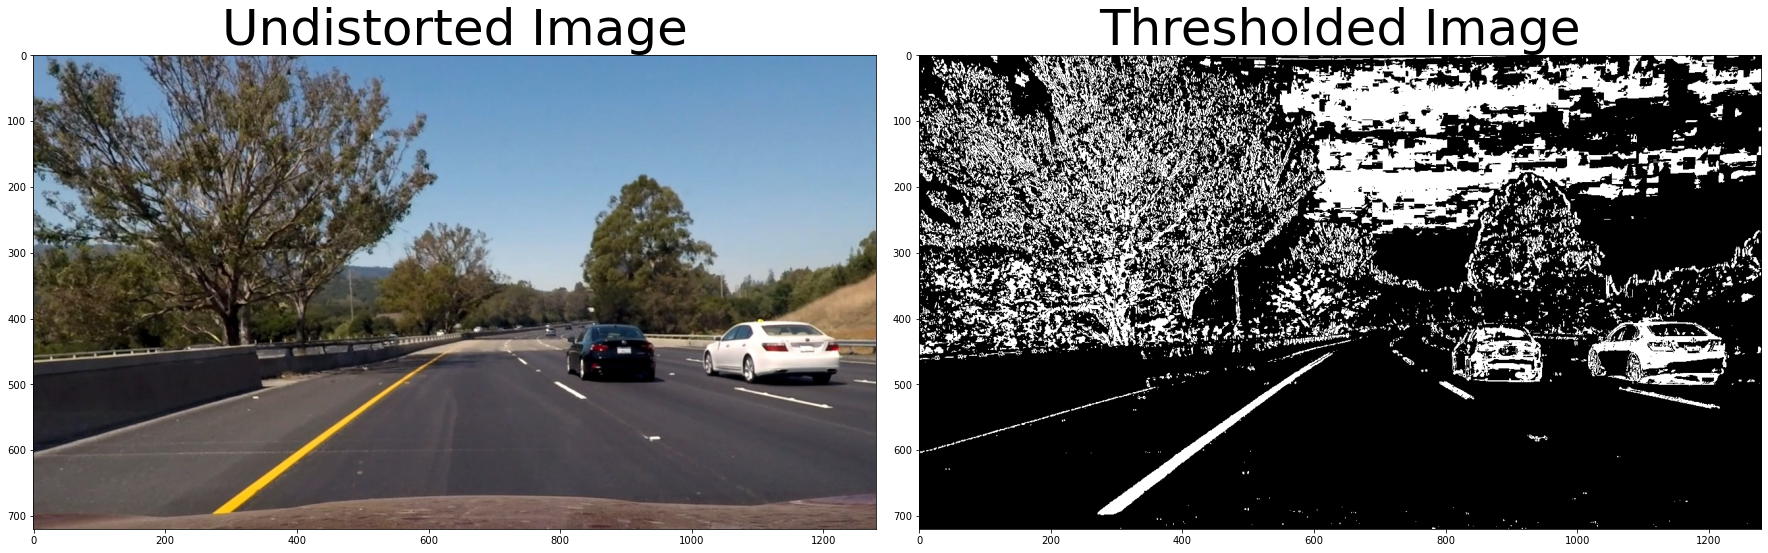

In [15]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(dst)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(combined_binary,cmap="gray")
ax2.set_title('Thresholded Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)